###### Material desenvolvido para o minicurso: Introdução à solução numérica de EDP's, ministrado no ERMAC/2018 de 5 a 6 de abril de 2018 na Universidade Federal de Lavras, Lavras/MG, Brasil. Autor: [Jonas Laerte Ansoni](http://jonasansoni.blogspot.com.br/).

<img src="./figuras/logoemarc.png" width="30%">

# <center> Minicurso:<font color='blue'> Introdução à solução numérica de EDP's

Neste _IPython notebook_ iniciaremos os estudos da solução numérica das EDP's apresentando um modelo simplificado da dispersão de poluentes no ar. Através deste exemplo será possível fazer a introdução ao método das diferenças finitas para resolvermos numericamente a equação de transporte (equação de convecção-difusão).

## 2. Modelo para a dispersão de poluentes

<div class="alert alert-light" role="alert">
  Exemplo adaptado do material: Nachbin, A. ; TABAK, E. . Introdução à Modelagem Matemática e Computação Científica II, SBMAC. XX CNMAC/SBMAC, 1997. 114p - https://www.youtube.com/watch?v=iRzUUmEOUO8
</div>

A chaminé de uma fábrica solta fumaça com um produto tóxico, com uma concentração inicial $\alpha$. Uma pessoa interessada em comprar a casa a uma distância $d$ da fábrica nos consulta sobre a condição do ar na vizinhança. 

<img src="./figuras/simpsons.gif" width="38%">

<img src="./figuras/fig1.png" width="75%">
#### <center> Figura 1. Diagrama ilustrando o problema de dispersão de poluentes.

Considerando a pior situação possível, na qual o vento sopra na direção da casa com velocidade máxima $u$. O mecanismo de __transporte__, no qual a nuvem é carregada (transportada) pelo vento sem mudar de forma, é chamado de __advecção__. Também devemos levar em consideração o mecanismos de __difusão__, no qual a nuvem vai se espalhando ao mesmo tempo que a concentração do poluente vai baixando. 

Acabamos de escolher o modelo físico, ou seja, decidimos que tipos de mecanismos levaremos em conta no nosso estudo. Agora precisamos fazer a representação matemática dos mecanismos de transporte e difusão. 

<div class="alert alert-warning" role="alert">
  <p><font color='Red'> __Objetivo__:</font> Calcular o nível final do poluente (ou seja, a concentração $c=c(x,t)$) nos arredores da casa.</p>
</div>

### 2.1. Modelo simplificado: Equação de transporte

\begin{equation}
\frac{\partial c}{\partial t} = -u \frac{\partial c}{\partial x}+ k \frac{\partial^2 c}{\partial x^2}
\end{equation}

<div class="alert alert-danger" role="alert">
  <center><h5> Termo advectivo (convectivo) + Temo difusivo: Equação de transporte</h5>
</div>

Vamos desprezar inicialmente o termo difusivo: $k \frac{\partial^2 c}{\partial x^2}$. Temos então a equação de advecção (convecção), em que $u>0$ é constante:

\begin{equation}
\frac{\partial c}{\partial t} + u \frac{\partial c}{\partial x} = 0 \Longrightarrow \frac{\partial c}{\partial t} = -u \frac{\partial c}{\partial x}
\end{equation}
onde o termo $-u \frac{\partial c}{\partial x}$ é o termo convectivo, inercial ou advectivo.

A equação representa uma *onda* propagando com velocidade $u$ na direção $x$. Com condição inicial $c(x,0)=c_0(x)$ conforme a figura abaixo, a equação tem solução exata dada por:

\begin{equation}c(x,t)=c_0(x-ut)\end{equation}


<img src="./figuras/fig2.png" width="65%" label="assa">
#### <center> Figura 2. Modelagem de uma nuvem de poluente.

<div class="alert alert-warning" role="alert">
  <p> Verifique isso!!!</p>
</div>

##### (Pode-se utilizar por exemplo o método das características. Uma exelente explicação pode ser vista nas aulas do prof. André Nachbin (IMPA) [Link](https://youtu.be/2ugsEkBko-0))

##### *Livro J. C. Strickwerda, 'Finite Difference Schemes and Partial Differential Equations' , Chapman & Hall, 1989


<img src="./figuras/fig3.png" width="45%">
#### <center> Figura 3. Curvas características para uma onda positiva.

<div class="alert alert-warning" role="alert">
  <p><font color='red'> _Vamos ver agora como resolver numericamente essa equação da onda, e verificar quais as conseguencias das nossas escolhas de qual metodologia numérica utilizada._</font></p>
</div>

### <font color='blue'> 2.2. Método das diferenças finitas

Para que a solução seja calculada precisamos realizar a discretização da equação em relação ao tempo e ao espaço.

Vamos considerar o domínio discreto em relação ao *espaço-tempo*, onde as coordenadas na direção horizontal representam o avanço no tempo de $t^n$ à $t^{n+1}$ - e as coordenadas na direção vertical em relação ao movimento no espaço: pontos consecutivos são $x_{i-1}$, $x_i$, e $x_{i+1}$. Isso cria uma malha onde um ponto tem ambos os índices, temporal e espacial. A seguir temos uma representação gráfica da malha tempo-espaço:

\begin{matrix}
t^{n+1} & \rightarrow & \bullet  && \bullet  && \bullet  \\
t^n & \rightarrow & \bullet  && \bullet  && \bullet  \\
& &  x_{i-1} && x_i && x_{i+1}
\end{matrix}

Para a solução numérica de $c(x,t)$, utilizaremos os índices subscritos para denotar a posição espacial, como $c_i$, e sobrescrito denota o instante temporal, como $c^n$. Temos portanto a representação discreta como $c^{n}_{i}$.
 
\begin{matrix}
& &\bullet & & \bullet & &  \bullet \\
& &c^{n+1}_{i-1} & & c^{n+1}_i & & c^{n+1}_{i+1} \\
& &\bullet & & \bullet & &  \bullet \\
& &c^n_{i-1} & & c^n_i & & c^n_{i+1} \\
& &\bullet & & \bullet & &  \bullet \\
& &c^{n-1}_{i-1} & & c^{n-1}_i & & c^{n-1}_{i+1} \\
\end{matrix}

Outra maneira de obter a nossa discretização é dizer que ela é obtida por passos constantes no tempo e espaço, $\Delta t$ e $\Delta x$, como a seguir:

\begin{eqnarray}
x_i &=& i\, \Delta x \quad \text{and} \quad t^n= n\, \Delta t \nonumber \\
c_i^n &=& c(i\, \Delta x, n\, \Delta t)
\end{eqnarray}

### <font color='red'> Desenvolvimento _"The Flash"_ dos métodos de diferença finitas na lousa.

<div class="alert alert-light" role="alert">
  https://www.youtube.com/watch?v=iz22_37mMkk&list=PL30F4C5ABCE62CB61&index=5
</div>


### 2.3. Discretizando nossa equação modelo: Equação hiperbólica

Vamos ver como discretizar a equação de convecção linear 1D tanto no espaço como no tempo. Por definição, a derivada parcial em relação ao tempo muda apenas com o tempo e não com o espaço; sua forma discretizada altera apenas os indices $n$. Da mesma forma, a derivada parcial em relação a $x$ muda com o espaço e não o tempo, e apenas os indices $i$ são afetados.

Vamos discretizar a coordenada espacial $x$ em pontos indexados de $i=0$ à $N$, e depois realizar os passos no tempo discreto em intervalos de tamanho $\Delta t$.

Considerando a derivada em relação ao tempo e discretizando com diferenças progressivas:

\begin{equation}\frac{\partial c}{\partial t}(i\Delta x, n\Delta t)\approx \frac{c^{n+1}_i-c^n_i}{\Delta t}\end{equation} 

Aproximando a derivada para o espaço com diferenças atrasadas:

\begin{equation}\frac{\partial c}{\partial x}(i\Delta x, n\Delta t)\approx \frac{c^{n}_i-c^n_{i-1}}{\Delta x}\end{equation} 

Esta discretização é chamada de <font color='blue'> **upwind,** </font> em que a aproximação da derivada espacial depende da direção de propagação das caracteristicas (na direção de onde vem o escoamento). 

Para a equação abordada $u>0$ e aplicando a discretização *upwind* acima representada, temos:

\begin{equation} \frac{c^{n+1}_i-c^n_i}{\Delta t}+u\frac{c^{n}_i-c^n_{i-1}}{\Delta x}=0 \end{equation}
ou
\begin{equation} c^{n+1}_i=c^n_i-u\frac{\Delta t}{\Delta x}(c^{n}_i-c^n_{i-1}) \end{equation}

![FTBS_stencil](figuras/stencil.png)
#### <center> Figura 4. Molêcula computacional para o esquema "forward-time/backward-space".

### <span class="badge badge-pill badge-warning">_Pergunta:_</span> <font color='Orange'> Pergunta: O método apresentado é explícito ou implícito??</font>

### Vamos calcular!!!


A seguir vamos carregar as bibliotecas que vamos utilizar para ler vetores e plotar gráficos. *Let's get a little Python on the road.*

In [1]:
import numpy                       
from matplotlib import pyplot                 
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Como o primeira exercício, vamos resolver a equação linear unidimencional com a condição inicial sendo uma *onda quadrada* como descrito a seguir:

\begin{equation}
c(x,0)=\begin{cases}1 & \text{se } 0,5\leq x \leq 1,\\
0 & \text{em qualquer outro lugar em } (0, 2)
\end{cases}
\end{equation}

Com a condição de contorno em $c=0$ em $x=0$. O domínio espacial para a solução numérica sendo o intervalo $x\in (0, 2)$.

<img src="./figuras/fig4.png" width="50%" align="center">

#### <center> Figura 5. Onda "quadrada" condição inicial.

Agora vamos definir algumas variáveis; 
Now let's define a few variables; queremos fazer uma malha de pontos uniformemente espaçada dentro do domínio espacial. No código abaixo, definimos uma variável chamada`nx` que será o número de pontos de malha espacial, e a variável `dx` que será a distância entre qualquer par de pontos adjacentes. Também definimos o passo de tempo, `dt`, sendo o número total de passos no tempo, `nt`. A velocidade da onda (velocidade do vento) é definida como $u=1$.  

In [2]:
nx = 41  
dx = 2/(nx-1)
nt = 25 #25   
dt = .025  
u = 1      #assume wavespeed of u = 1
x = numpy.linspace(0,2,nx)

Precisamos configurar a condição inicial do problema. Aqui utilizamos a função NumPy `zeros()`, definindo um vetor com `nx` elementos todos com valores igual a $0$. (Existe também a função `ones()`). Agora podemos *alterar um pedaço* do vetor em que $c=1$, para obtermos a onda e em seguida imprimir o vetor inicial, somente para verificarmos. 

Mas quais valores podemos alterar?

O problema consiste em verificar quais os indices de `c` a onda quadrada inicia em $x = 0.5$ e termina em $x = 1$.
Para isto, utilizamos a função `numpy.where` para retornar uma lista dos indices onde o vetor $x$ encontra (ou não encontra) alguma condição.

```python
c = numpy.zeros(nx)      #numpy function ones()
lbound = numpy.where(x >= 0.5)
ubound = numpy.where(x <= 1)

print(lbound)
print(ubound)
```

In [3]:
c = numpy.zeros(nx)      #numpy function ones()
lbound = numpy.where(x >= 0.5)
ubound = numpy.where(x <= 1)

print(lbound)
print(ubound)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]),)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]),)


Com isto obtemos dois vetores. `lbound`, que indica os indices para $x \geq .5$ e 'ubound', que indica os indices para $x \leq 1$.  Para combinar ambos os vetores, utilizamos uma intersecção entre os vetores com a função `numpy.intersect1d`.  

In [4]:
bounds = numpy.intersect1d(lbound, ubound)
c[bounds]=1  #setting c = 1 between 0.5 and 1 as per our I.C.s
print(c)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Em Python podemos combinar comandos. Podemos escrever
```Python
c[numpy.intersect1d(numpy.where(x >= 0.5), numpy.where(x <= 1))] = 1
```
mas isto dificulta um pouco a leitura do código.

Agora vamos verificar as condições iniciais do problema se está tudo OK.

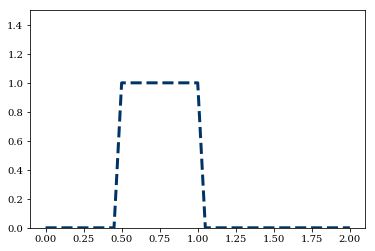

In [5]:
pyplot.plot(x, c, color='#003366', ls='--', lw=3)
pyplot.ylim(0,1.5);

### <font color='orange'> Parece muito perto do que esperávamos. Mas parece que os lados da onda quadrada não são perfeitamente verticais. Isso esta certo? Pense um pouco!!!

### Forma discreta da equação de convecção linear
Agora é hora de escrever algum código para a forma discreta da equação de convecção usando nosso esquema de diferenças finitas escolhido.

Para todo elemento da nossa matriz `c`, precisamos realizar a operação:

$$c_i^{n+1} = c_i^n - u \frac{\Delta t}{\Delta x}(c_i^n-c_{i-1}^n)$$

Vamos armazenar o resultado em uma nova matriz (temporária) `cn`, a qual será a solução $c$ para o próximo passo. Vamos repetir esta operação por tantos passos de tempo como especificamos e então podemos ver o quão longe a onda já percorreu.

Então, podemos pensar que temos duas operações iterativas: uma no espaço e uma em tempo (aprenderemos de forma diferente mais tarde), então podemos começar aninhando um loop espacial dentro do ciclo de tempo, como mostrado abaixo. Você vê que o código do esquema de diferenças finitas é uma expressão direta da equação discreta:

In [6]:
for n in range(1,nt):  
    cn = c.copy() 
    for i in range(1,nx):
        c[i] = cn[i]-u*dt/dx*(cn[i]-cn[i-1])

**Observação 1:** Destacamos no código acima que o problema necessita de condição de contorno em $x=0$. Aqui não foi necessário impor esta condição para toda iteração porque a discretização não altera o valor de c[0].

**Observação 2:** Aprenderemos mais tarde que o código como escrito acima é bastante ineficiente, e há melhores maneiras de escrever isso, Python-style. Mas vamos continuar.

Agora vamos inspecionar nossa matriz de soluções e depois avançar no tempo com um gráfico de linha.

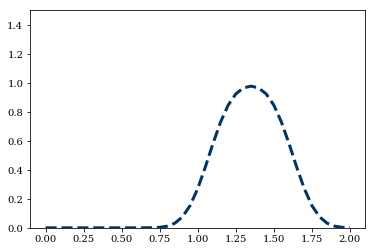

In [7]:
pyplot.plot(x, c, color='#003366', ls='--', lw=3)
pyplot.ylim(0,1.5);

###  <font color='orange'> Nossa onda quadrada definitivamente se moveu para a direita, mas já não está na forma de um chapéu alto. **O que está acontecendo?**

In [8]:
import io
import base64
from IPython.display import HTML

video = io.open('./figuras/wave1.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /> </video>'''.format(encoded.decode('ascii')))

### Olhar mais profundo

A solução difere da onda quadrada esperada porque a equação discretizada é uma aproximação da equação diferencial contínua que queremos resolver. Há erros: nós sabíamos disso. Mas a forma modificada da onda inicial é algo curioso. Talvez possa ser melhorado, tornando o espaçamento da malha mais fino. Por que você não tenta? Isso ajuda?

### 2.4 Erro de truncamento espacial

Lembrando que a aproximação por diferença finitas para a derivada espacial:

\begin{equation}\frac{\partial c}{\partial x}\approx \frac{c(x+\Delta x)-c(x)}{\Delta x}\end{equation}

Obtemos usando a definição da derivada em um ponto, e simplesmente removendo o limite, assumindo que $\Delta x$ é muito pequeno. Mas já aprendemos com o método de Euler que isso apresenta um erro, chamado *erro de truncamento*.

Usando uma expansão da série Taylor para os termos espaciais agora, vemos que o esquema de diferença inversa produz um método de primeira ordem, no espaço.

\begin{equation}
\frac{\partial c}{\partial x}(x_i) = \frac{c(x_i)-c(x_{i-1})}{\Delta x} + \frac{\Delta x}{2} \frac{\partial^2 c}{\partial x^2}(x_i) - \frac{\Delta x^2}{6} \frac{\partial^3 c}{\partial x^3}(x_i)+ \cdots
\end{equation}

O termo dominante que é negligenciado na aproximação das diferenças finitas é de $\mathcal{O}(\Delta x)$. Também vemos que a aproximação *converge* para a derivada exata quando $\Delta x \rightarrow 0$.

Em resumo, o esquema de diferença de *"forward-time/backward space"* escolhido é de primeira ordem tanto no espaço quanto no tempo: os erros de truncamento são $\mathcal{O}(\Delta t, \Delta x)$. 

__Nós vamos voltar para a falar disso!__

### 2.5. Convecção não-linear

Vamos considerar a equação de convecção não-linear, usando os mesmos métodos de antes. A equação de convecção 1-D é:

\begin{equation}\frac{\partial c}{\partial t} + c \frac{\partial c}{\partial x} = 0\end{equation}

A única diferença com o caso linear é que substituímos a velocidade da onda constante $u$ pela velocidade variável $c$. A equação é não-linear porque agora temos um produto da solução e uma de suas derivadas: o produto $c\partial c / \partial x$. Isso muda tudo!

Vamos utilizar a mesma discretização que aprendemos para o caso de convecção linear: diferenças adiantadas no tempo e atrasadas no espaço. Aqui temos a equação discretizada:

\begin{equation}\frac{c_i^{n+1}-c_i^n}{\Delta t} + c_i^n \frac{c_i^n-c_{i-1}^n}{\Delta x} = 0\end{equation}

Resolvendo para o termos $u_i^{n+1}$, temos a seguinte expressão utilizada para avançar no tempo:

\begin{equation}c_i^{n+1} = c_i^n - c_i^n \frac{\Delta t}{\Delta x} (c_i^n - c_{i-1}^n)\end{equation}

Há muito pouco que precisa mudar do código escrito até agora. Na verdade, até usaremos a mesma condição inicial de onda quadrada. Mas vamos reinicializar a variável `c` com os valores iniciais e redigitar os parâmetros numéricos aqui, por conveniência (já não precisamos mais de $u$).


In [9]:
##problem parameters
nx = 41
dx = 2/(nx-1)
nt = 10    
dt = .02  

##initial conditions
u = numpy.ones(nx)      
u[numpy.intersect1d(lbound, ubound)]=2  

How does it look?

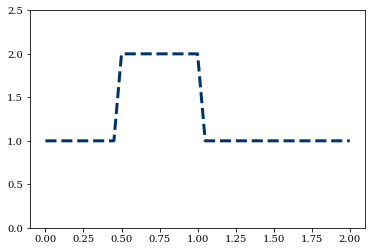

In [10]:
pyplot.plot(x, u, color='#003366', ls='--', lw=3)
pyplot.ylim(0,2.5);

Alterando apenas uma linha de código na solução de convecção linear, podemos agora obter a solução não-linear: a linha que corresponde à equação discreta agora tem `cn[i]` no lugar onde antes tínhamos apenas `u`. Então você poderia escrever algo como:
```Python
for n in range(1,nt):  
  un = u.copy() 
  for i in range(1,nx): 
    u[i] = un[i]-un[i]*dt/dx*(un[i]-un[i-1]) 
```
Nós vamos ser mais espertos do que isso e usar o NumPy para atualizar todos os valores da grade espacial de uma só vez. Nós realmente não precisamos escrever uma linha de código que seja executada *para cada* valor de $c$ na grade espacial. O Python pode atualizá-los todos de uma vez! Estude o código abaixo e compare-o com o código acima. Aqui está um esboço útil, para ilustrar a operação da matriz - também chamada de operação "vetorizada" - por $c_i-c_{i-1} $.

![vectorizedstencil](figuras/vectorizedstencil.png)
<br>
#### <center>Figura 2: Esboço para explicar a operação de estêncil vetorizado..  Adapitado de ["Indices point between elements"](https://blog.nelhage.com/2015/08/indices-point-between-elements/) by Nelson Elhage.  

In [11]:
for n in range(1, nt):  
    un = u.copy() 
    u[1:] = un[1:]-un[1:]*dt/dx*(un[1:]-un[0:-1])

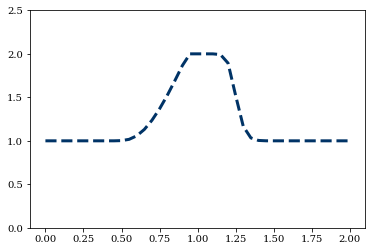

In [12]:
pyplot.plot(x, u, color='#003366', ls='--', lw=3)
pyplot.ylim(0,2.5);

Hmm. Isso é bem interessante: como no caso linear, vemos que perdemos os lados afiados da nossa onda quadrada inicial, mas há mais. Agora, a onda também perdeu simetria! Parece estar ficando para trás, enquanto a frente da onda está se inclinando. Essa é outra forma de erro numérico, você pode se perguntar? Não! É física!

##### Pense um pouco!!!
Pense no efeito de ter substituído a velocidade de onda constante $u$ pela velocidade variável dada pela solução $c$. Isso significa que diferentes partes da onda se movem em velocidades diferentes. Faça um esboço de uma onda inicial e pense em onde a velocidade é mais alta e onde ela é mais baixa ...

## Exercício:

Com os parâmetros de solução que inicialmente sugerimos, a malha espacial teve 41 pontos e o *timestep* (passo de tempo) foi de 0,025. Agora, vamos alterar o número de pontos na malha. Escreva o código corresponde ao caso de convecção linear como uma função para que possamos examinar facilmente o que acontece quando ajustamos apenas uma variável: o tamanho da malha. Teste com  *nx=*41; 61; 71; e 85. Veja o que acontece.

In [13]:
import numpy                       
from matplotlib import pyplot    
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [14]:
def linearconv(nx):
    """Solve the linear convection equation.
    
    Solves the equation d_t c + u d_x c = 0 where 
    * the wavespeed u is set to 1
    * the domain is x \in [0, 5]
    * 20 timesteps are taken, with \Delta t = 0.025
    * the initial data is the hat function
    
    Produces a plot of the results
    
    Parameters
    ----------
    
    nx : integer
        number of internal grid points
        
    Returns
    -------
    
    None : none
    """
    dx = 2/(nx-1)
    nt = 25    
    dt = .025  
    u = 1
    
    x = numpy.linspace(0,2,nx)

    c = numpy.zeros(nx)
    lbound = numpy.where(x >= 0.5)
    ubound = numpy.where(x <= 1)
    c[numpy.intersect1d(lbound, ubound)]=1  

    cn = numpy.zeros(nx) 

    for n in range(nt): 
        cn = c.copy() 
        c[1:] = cn[1:] -u*dt/dx*(cn[1:] -cn[0:-1]) 
        c[0] = 0.0
        

    pyplot.plot(x, c, color='#003366', ls='--', lw=3)
    pyplot.ylim(-0.5,1.5);  

### Vamos calcular!!

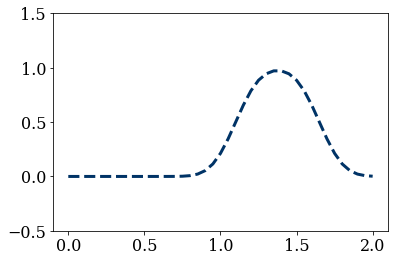

In [15]:
linearconv(41) #convection using 60 grid points

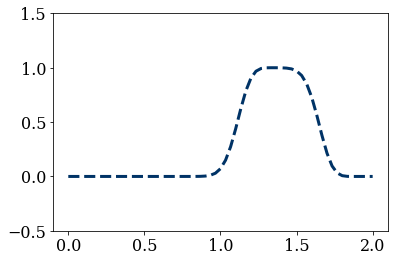

In [16]:
linearconv(61) #convection using 75 grid points

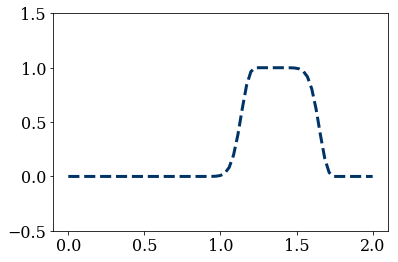

In [17]:
linearconv(71) #convection using 80 grid points

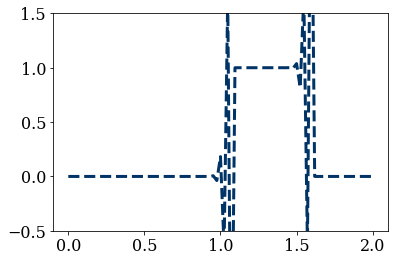

In [18]:
linearconv(85) #convection using 81 grid points

### O que aconteceu??

### <font color='red'> Vamos ver em mais detalhes!

In [19]:
from IPython.core.display import HTML
css_file = '../styles/custom.css'
HTML(open(css_file, "r").read())